# Sentiment Analysis

We start by loading data from our *comments* table in our Database

In [6]:
import sqlite3
import pandas as pd

con = sqlite3.connect('nytimes-comments.db')
comments = pd.read_sql_query("SELECT commentID, commentBody, articleID, newDesk FROM Comments", con)

**The following takes a while to run**

Using a pre-trained Sentiment Analysis Model, we get sentiment scores for each comment. The Polarity Score will be in the range -1 to 1 where the lower the polarity, the more negetive the comment.

In [7]:
from textblob import TextBlob

polarity = []
subjectivity = []

for comment in comments['commentBody']:
    blob = TextBlob(comment)
    polarity.append(blob.sentiment.polarity)
    subjectivity.append(blob.sentiment.subjectivity)
print('making dataframe')
comments['Polarity'] = polarity
comments['Subjectivity'] = subjectivity

comments.shape

making dataframe


(2047446, 6)

We now load the scores data into the Database to preserve our results

In [8]:
comments.to_sql('commentScore', con, if_exists = 'replace')

Classify each comment as Positive, Negative, or Neutral

In [9]:
grades = []
for score in comments['Polarity']:
    if score < 0:
        grades.append('Negative')
    elif score == 0:
        grades.append('Neutral')
    else:
        grades.append('Positive')

Plot the distribution of the classified comments

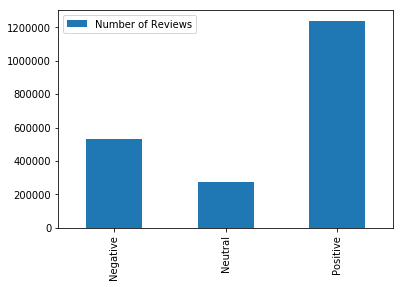

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

counts = Counter(grades)
df = pd.DataFrame.from_dict(counts, orient='index')
df.plot(kind='bar')
L = plt.legend()
L.get_texts()[0].set_text('Number of Reviews')
plt.show()